In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/content/marketing_campaign.csv',delimiter = '\t')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [4]:
list(data.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [5]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [8]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [9]:
data = data[data['Income'].notnull()]
data.reset_index(drop=True, inplace=True)

In [10]:
data['Year'] = data['Dt_Customer'].apply(lambda row: row.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013
2212,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2014
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


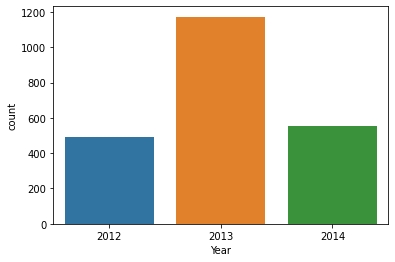

In [12]:
sns.countplot(data['Year'])

In [13]:
data['Age'] = data['Year'] - data['Year_Birth']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,55
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,48
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013,46
2212,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2014,68
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014,33
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014,58


In [15]:
vis_data = data.copy()
vis_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,55
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,48
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013,46
2212,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,2014,68
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014,33
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014,58


In [16]:
vis_data.drop([
    'ID',
    'Year_Birth',
    'Education',
    'Marital_Status',
    'Dt_Customer',
    'Year'
],axis=1, inplace=True)

vis_data.rename({
    'MntWines': 'WineRank',
    'MntFruits': 'FruitsRank',
    'MntMeatProducts': 'MeatRank',
    'MntFishProducts': 'FishRank',
    'MntSweetProducts': 'SweetRank',
    'MntGoldProds': 'GoldRank',
    'NumWebPurchases': 'WebRank',
    'NumCatalogPurchases': 'CatalogRank',
    'NumStorePurchases': 'StoreRank'
}, axis=1, inplace=True)

vis_data

,Income,Kidhome,Teenhome,Recency,WineRank,FruitsRank,MeatRank,FishRank,SweetRank,GoldRank,NumDealsPurchases,WebRank,CatalogRank,StoreRank,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46
2212,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2213,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2214,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58


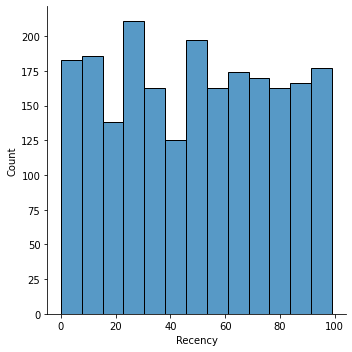

In [17]:
sns.displot(vis_data['Recency'])

In [18]:
vis_data.drop(['Recency'], axis=1, inplace=True)
vis_data

,Income,Kidhome,Teenhome,WineRank,FruitsRank,MeatRank,FishRank,SweetRank,GoldRank,NumDealsPurchases,WebRank,CatalogRank,StoreRank,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55
1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48
3,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46
2212,64014.0,2,1,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2213,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2214,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58


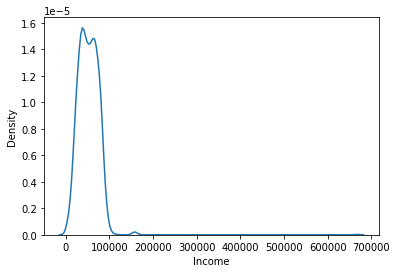

In [19]:
sns.kdeplot(data['Income'])

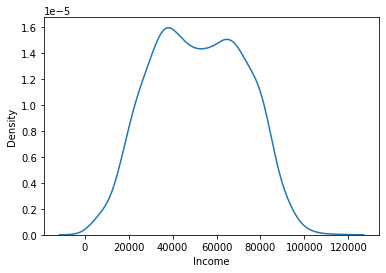

In [20]:
outlier_idx = vis_data[vis_data['Income'] > 150000].index
vis_data.drop(outlier_idx, inplace=True)

sns.kdeplot(vis_data['Income'])

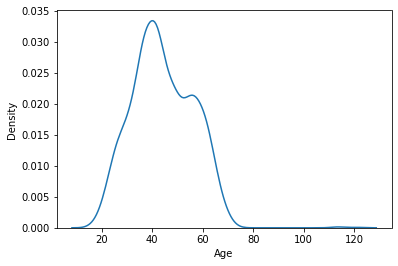

In [21]:
sns.kdeplot(data['Age'])

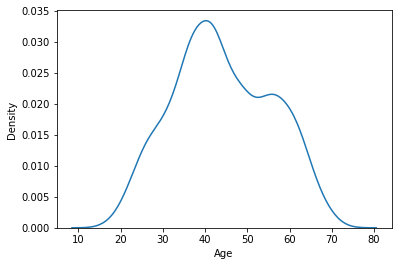

In [22]:
outlier_age = vis_data.loc[vis_data['Age'] > 90].index
vis_data.drop(outlier_age, inplace=True)
vis_data.reset_index(drop=True, inplace=True)

sns.kdeplot(vis_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


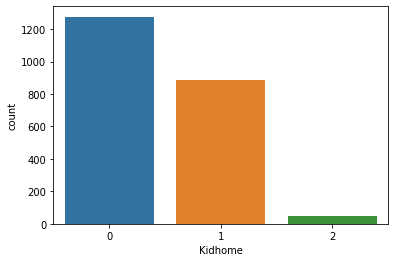

In [23]:
sns.countplot(vis_data['Kidhome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


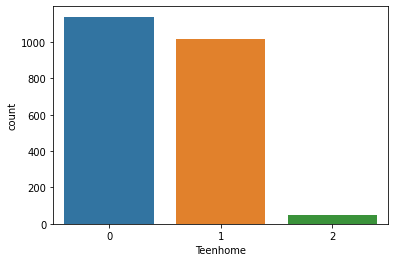

In [24]:
sns.countplot(vis_data['Teenhome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


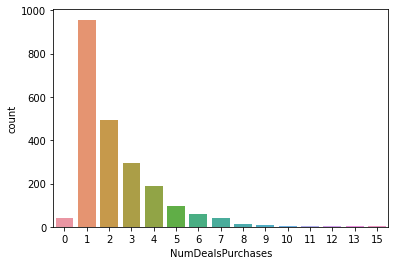

In [25]:
sns.countplot(vis_data['NumDealsPurchases'])

In [26]:
vis_data['Kidhome'] = vis_data['Kidhome'].apply(lambda row: 1 if row >= 1 else 0)
vis_data['Teenhome'] = vis_data['Teenhome'].apply(lambda row: 1 if row >= 1 else 0)

vis_data

,Income,Kidhome,Teenhome,WineRank,FruitsRank,MeatRank,FishRank,SweetRank,GoldRank,NumDealsPurchases,WebRank,CatalogRank,StoreRank,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55
1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48
3,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46
2201,64014.0,1,1,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2202,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2203,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58


In [27]:
from sklearn.preprocessing import StandardScaler

c_al_data = vis_data.copy()
main_data = vis_data.copy()
c_al_data

,Income,Kidhome,Teenhome,WineRank,FruitsRank,MeatRank,FishRank,SweetRank,GoldRank,NumDealsPurchases,WebRank,CatalogRank,StoreRank,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55
1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48
3,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46
2201,64014.0,1,1,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68
2202,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33
2203,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58


In [28]:
num_col = ['Income', 'Age', 'NumDealsPurchases', 'NumWebVisitsMonth']
cat_col = ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

In [29]:
c_al_data['Accepted'] = c_al_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1) > 0
c_al_data['Accepted'] = c_al_data['Accepted'].apply(lambda row: 1 if row else 0)

c_al_data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1, inplace=True)

c_al_data

,Income,Kidhome,Teenhome,WineRank,FruitsRank,MeatRank,FishRank,SweetRank,GoldRank,NumDealsPurchases,WebRank,CatalogRank,StoreRank,NumWebVisitsMonth,Complain,Age,Accepted
0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,55,1
1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,60,0
2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,48,0
3,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,30,0
4,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,0,46,0
2201,64014.0,1,1,406,0,30,0,0,8,7,8,2,5,7,0,68,1
2202,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,0,33,1
2203,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,0,58,0


In [30]:
c_al_data = pd.DataFrame(StandardScaler().fit_transform(c_al_data), columns=c_al_data.columns)

In [31]:
for i in c_al_data.columns:
    c_al_data[i].astype(dtype=float)

c_al_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2205 non-null   float64
 1   Kidhome            2205 non-null   float64
 2   Teenhome           2205 non-null   float64
 3   WineRank           2205 non-null   float64
 4   FruitsRank         2205 non-null   float64
 5   MeatRank           2205 non-null   float64
 6   FishRank           2205 non-null   float64
 7   SweetRank          2205 non-null   float64
 8   GoldRank           2205 non-null   float64
 9   NumDealsPurchases  2205 non-null   float64
 10  WebRank            2205 non-null   float64
 11  CatalogRank        2205 non-null   float64
 12  StoreRank          2205 non-null   float64
 13  NumWebVisitsMonth  2205 non-null   float64
 14  Complain           2205 non-null   float64
 15  Age                2205 non-null   float64
 16  Accepted           2205 

,Income,Kidhome,Teenhome,WineRank,FruitsRank,MeatRank,FishRank,SweetRank,GoldRank,NumDealsPurchases,WebRank,CatalogRank,StoreRank,NumWebVisitsMonth,Complain,Age,Accepted,0,1,2,3,4,5,6,7,8,9
0,0.314651,-0.853262,-0.967424,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,-0.095673,0.926493,1.628085,4.051145,-0.117297,1.641191,-0.349948,0.136119,2.257840,-0.860555,-0.996439,0.990212,0.143479
1,-0.254877,1.171973,1.033673,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.095673,1.352402,-0.614218,-2.386579,0.330367,-1.655803,-0.129457,-0.095772,0.632688,-1.020658,0.491500,-0.026894,0.100453
2,0.965354,-0.853262,-0.967424,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.095673,0.330220,-0.614218,1.875634,-0.229479,-0.505255,0.494616,-0.195335,-0.572791,0.825805,-1.069053,0.873991,-0.388607
3,-1.206087,1.171973,-0.967424,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.095673,-1.203054,-0.614218,-2.656269,-1.406455,0.637343,0.327468,-0.195450,-0.598028,0.020399,0.092747,0.219036,0.024239
4,0.322136,1.171973,-0.967424,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.095673,-0.947508,-0.614218,-0.376374,-0.286974,1.276545,1.115975,-0.267620,-0.870825,-0.994963,0.240762,0.544781,-0.078106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.463624,-0.853262,1.033673,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,0.126750,-0.562650,-0.139645,-0.095673,0.159856,-0.614218,2.592053,1.383434,0.512621,1.409999,-0.612539,1.854539,2.326785,0.267131,-0.849197,1.559397
2201,0.598401,1.171973,1.033673,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,-0.230646,-0.254109,0.689203,-0.095673,2.033857,1.628085,-0.769001,3.469029,0.697904,-1.274315,0.348843,0.604872,-1.847604,-0.159399,0.429963,0.100139
2202,0.258780,-0.853262,-0.967424,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,0.126750,2.214218,0.274779,-0.095673,-0.947508,1.628085,1.566647,-0.702802,0.874626,-1.711905,0.376670,-1.428583,0.429069,-0.249873,-0.265958,-1.359055
2203,0.851004,-0.853262,1.033673,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,0.841543,1.288596,-0.968493,-0.095673,1.182039,-0.614218,2.045635,1.159803,-1.580365,0.409584,-0.200166,-0.242584,0.150243,0.181740,0.240154,0.047475


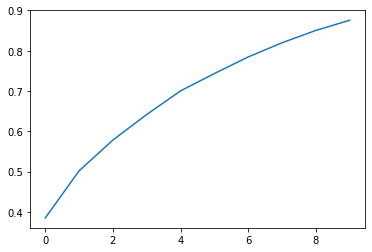

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca_data = pd.DataFrame(pca.fit_transform(c_al_data))

plt.plot(pca.explained_variance_ratio_.cumsum())

c_al_data = pd.concat([c_al_data, pca_data], axis=1)

c_al_data

In [33]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS, Isomap

In [34]:
tsne = TSNE(learning_rate=50)

tsne_results = c_al_data.copy()

tsne_results[['TSNE1', 'TSNE2']] = pd.DataFrame(tsne.fit_transform(c_al_data[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]), columns=['TSNE1', 'TSNE2'])

tsne_results

,Income,Kidhome,Teenhome,WineRank,FruitsRank,MeatRank,FishRank,SweetRank,GoldRank,NumDealsPurchases,WebRank,CatalogRank,StoreRank,NumWebVisitsMonth,Complain,Age,Accepted,0,1,2,3,4,5,6,7,8,9,TSNE1,TSNE2
0,0.314651,-0.853262,-0.967424,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,-0.095673,0.926493,1.628085,4.051145,-0.117297,1.641191,-0.349948,0.136119,2.257840,-0.860555,-0.996439,0.990212,0.143479,30.257065,11.996751
1,-0.254877,1.171973,1.033673,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.095673,1.352402,-0.614218,-2.386579,0.330367,-1.655803,-0.129457,-0.095772,0.632688,-1.020658,0.491500,-0.026894,0.100453,-36.083733,43.954609
2,0.965354,-0.853262,-0.967424,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.095673,0.330220,-0.614218,1.875634,-0.229479,-0.505255,0.494616,-0.195335,-0.572791,0.825805,-1.069053,0.873991,-0.388607,13.361572,-11.263169
3,-1.206087,1.171973,-0.967424,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.095673,-1.203054,-0.614218,-2.656269,-1.406455,0.637343,0.327468,-0.195450,-0.598028,0.020399,0.092747,0.219036,0.024239,-18.885279,-50.468140
4,0.322136,1.171973,-0.967424,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.095673,-0.947508,-0.614218,-0.376374,-0.286974,1.276545,1.115975,-0.267620,-0.870825,-0.994963,0.240762,0.544781,-0.078106,-3.146937,-37.239307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.463624,-0.853262,1.033673,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,0.126750,-0.562650,-0.139645,-0.095673,0.159856,-0.614218,2.592053,1.383434,0.512621,1.409999,-0.612539,1.854539,2.326785,0.267131,-0.849197,1.559397,16.335806,4.897884
2201,0.598401,1.171973,1.033673,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,-0.230646,-0.254109,0.689203,-0.095673,2.033857,1.628085,-0.769001,3.469029,0.697904,-1.274315,0.348843,0.604872,-1.847604,-0.159399,0.429963,0.100139,9.196214,37.918133
2202,0.258780,-0.853262,-0.967424,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,0.126750,2.214218,0.274779,-0.095673,-0.947508,1.628085,1.566647,-0.702802,0.874626,-1.711905,0.376670,-1.428583,0.429069,-0.249873,-0.265958,-1.359055,43.897266,16.110790
2203,0.851004,-0.853262,1.033673,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,0.841543,1.288596,-0.968493,-0.095673,1.182039,-0.614218,2.045635,1.159803,-1.580365,0.409584,-0.200166,-0.242584,0.150243,0.181740,0.240154,0.047475,1.895372,0.810020


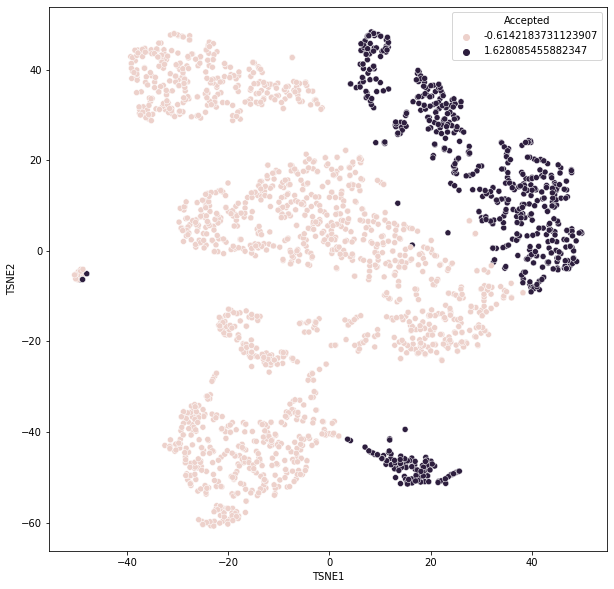

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Accepted', data=tsne_results)

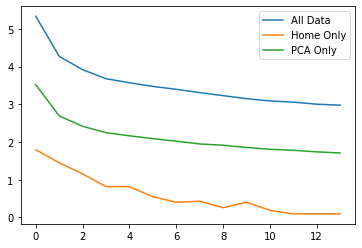

In [36]:
from scipy.cluster.vq import kmeans, vq
import random

random.seed(1000)

# All Data
cluster_data = c_al_data.copy()

distortions = []
for k in range(1, 15):
    _, distortion = kmeans(cluster_data, k)
    distortions.append(distortion)
    
plt.plot(distortions, label='All Data')

# Some Meaningful only
cluster_data = c_al_data.copy()[[
    'Kidhome', 'Teenhome', 'Complain', 'Accepted'
]]

distortions = []
for k in range(1, 15):
    _, distortion = kmeans(cluster_data, k)
    distortions.append(distortion)
    
plt.plot(distortions, label='Home Only')

# PCA Only
cluster_data = c_al_data.copy()[[
    0, 1, 2, 3, 4, 5, 6, 7
]]

distortions = []
for k in range(1, 15):
    _, distortion = kmeans(cluster_data, k)
    distortions.append(distortion)
    
plt.plot(distortions, label='PCA Only')




plt.legend()

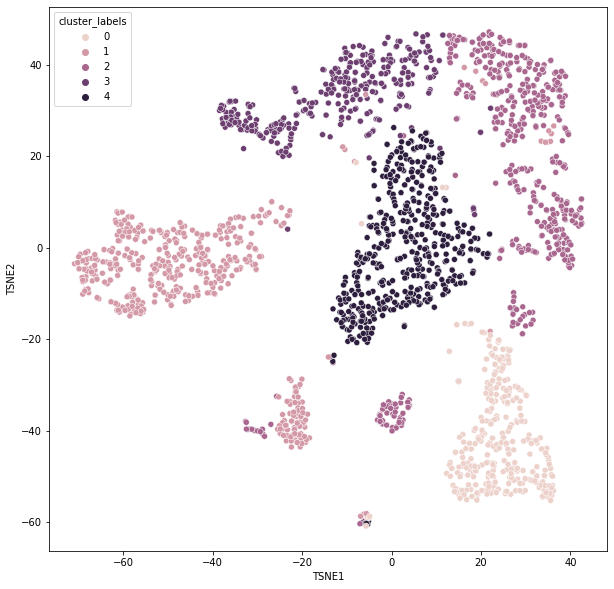

In [37]:
random.seed(500)

cluster_data = c_al_data.copy()[['Kidhome', 'Teenhome', 'Complain', 'Accepted']]

cluster_centers, _ = kmeans(cluster_data, 5)

cluster_data['cluster_labels'], _ = vq(cluster_data, cluster_centers)

tsne = TSNE(learning_rate=100)

tsne_results = cluster_data.copy()

tsne_results[['TSNE1', 'TSNE2']] = pd.DataFrame(tsne.fit_transform(c_al_data), columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10,10))

sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster_labels', cmap=sns.color_palette(), data=tsne_results)

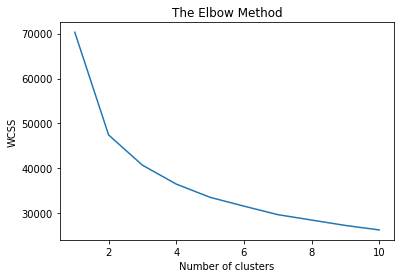

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans1.fit(c_al_data)
    wcss.append(kmeans1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans1.fit_predict(c_al_data)

In [40]:
y_kmeans

array([0, 1, 0, ..., 0, 3, 1], dtype=int32)

In [41]:
main_data['cluster'] = y_kmeans

**Cluster 1 "Medium-class parents / intelligency "- Older, 72 % in relationship, have 1 or 2 kids, Very High education ,Medium Income, Low to Medium Spending, rarely use promotions**

**Cluster 2 "Rich retired"- Older,65 % in relationship, No kids in home, High Education,High Income, High Spending, sometimes use promotion,**

**Cluster 3 "Single parent"- Young to middle Aged, 0 % in relationship, have often 1 kid, Standard education ,Low Income, Low to lower-medium spending, rarely use promotions**

**Cluster 4 "Love and married"- Young to Middle Aged, always in relationship, have 1 or 2 kids, Standard education, Low Income, Low spender, rarely use promotions**

**Cluster 5 "Rich, childfree"- Spread in age, mostly young, 65 % in relationship, have mostly 0 kids sometimes 1, High Education ,Very High income, Biggest Spender, very often use coupons**

In [42]:
main_data.to_csv('main.csv')